# Femur head vector generation

In [143]:
import SimpleITK as sitk
import matplotlib.pyplot as plt
import matplotlib.axes  as axs
import numpy as np
import itertools
import scipy.interpolate as interp


from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn import datasets


In [2]:
def get_femur_vector(itk_image,lower_limit,upper_limit):
    
    z_range = itk_image[0].GetSize()[2]
    
    vector_femur= np.zeros((1, z_range))
    
    slice_ones = vector_femur[ : , (lower_limit-1):(upper_limit)] 
    slice_ones[:] = 1
    
    return vector_femur #vector_femur is a vector array showing the existence of femur head along z-slices 

In [294]:
def train_classifier_ori (vect_list):
    
    xpts=[0]
  
    
    i = 0
    while i < (len(vect_list)):
        ypts=np.arange(vect_list[i].shape[1])
       
        if i == 0 :
            X_array= np.array(list(itertools.product(xpts, ypts)))
            X_conc = X_array

        else :
            X_array_copy  = X_conc #
            X_array= np.array(list(itertools.product(xpts, ypts)))
            X_conc = np.concatenate((X_array,X_array_copy),axis = 0)
            
        i += 1
    
    
    Y_conc = np.concatenate(vect_list,axis = 1)
        
        
    X_train = X_conc
    Y_train = np.concatenate(Y_conc)

    classifier = SVC(kernel='rbf', C=2,class_weight = 'balanced', probability=True, random_state=0,decision_function_shape='ovr')   
    classifier.fit(X_train, Y_train)  
        
        
    return classifier



In [324]:
def train_classifier (vect_list):
    
    xpts=[0]
  
    
    i = 0
    while i < (len(vect_list)):
        ypts=(np.arange(vect_list[i].shape[1]))/(vect_list[i].shape[1]-1)*100
       
        if i == 0 :
            X_array= np.array(list(itertools.product(xpts, ypts)))
            X_conc = X_array

        else :
            X_array_copy  = X_conc #
            X_array= np.array(list(itertools.product(xpts, ypts)))
            X_conc = np.concatenate((X_array,X_array_copy),axis = 0)
            
        i += 1
    
    
    Y_conc = np.concatenate(vect_list,axis = 1)
        
        
    X_train = X_conc
    Y_train = np.concatenate(Y_conc)

    classifier = SVC(kernel='rbf', C=100, probability=True, random_state=0)   
    classifier.fit(X_train, Y_train)  
        
        
    return classifier




In [296]:

def femur_head_selection_ori(im,vect_list, classifier):

    i = 0
    while i < (len(vect_list)):
       
       
        if i == 0 :
        
            vect_length= vect_list[i].shape[1]
            vect_length_max = vect_length
            index_largest = 0
            
        else :
            vect_length_ref = vect_length
            vect_length= vect_list[i].shape[1]
            
            if vect_length > vect_length_max:
                
                vect_length_max = vect_length
                index_largest = i
        i += 1
    
    
 
    
   
    
    vect_slice_largest = vect_list[index_largest]
    
    xpts=[0]
    ypts=np.arange(vect_slice_largest.shape[1])
    X_array= np.array(list(itertools.product(xpts, ypts)))
    
   
    proba_class = classifier.predict_proba(X_array)
    femur_presence_proba=proba_class[:,1]
    adjust_slices_target = im[0].GetSize()[2]
    
    interp_init = interp.interp1d(np.arange(femur_presence_proba.size),femur_presence_proba)
    adjusted_array = interp_init(np.linspace(0,femur_presence_proba.size-1,adjust_slices_target))

    index_max = max(range(len(adjusted_array)), key=adjusted_array.__getitem__) 
    slice_largest = index_max + 1
    
    #dec_func = classifier.decision_function
    
    
    return slice_largest, adjusted_array

In [313]:

def femur_head_selection(im, classifier):

  #  i = 0
   # while i < (len(vect_list)):
       
       
       # if i == 0 :
        
         #   vect_length= vect_list[i].shape[1]
         #   vect_length_max = vect_length
        #    index_largest = 0
            
       # else :
         #   vect_length_ref = vect_length
         #   vect_length= vect_list[i].shape[1]
            
         #   if vect_length > vect_length_max:
                
        #3        vect_length_max = vect_length
       #         index_largest = i
        #i += 1
    
    
 
    
   
    
    #vect_slice_largest = vect_list[index_largest]
    
    xpts=[0]
    ypts=(np.arange( im[0].GetSize()[2]))/ (im[0].GetSize()[2]-1)*100
    X_test= np.array(list(itertools.product(xpts, ypts)))
    
   
    proba_class = classifier.predict_proba(X_test)
    femur_presence_proba=proba_class[:,1]
   # 3adjust_slices_target = im[0].GetSize()[2]
    
    #interp_init = interp.interp1d(np.arange(femur_presence_proba.size),femur_presence_proba)
   # adjusted_array = interp_init(np.linspace(0,femur_presence_proba.size-1,adjust_slices_target))

    index_max = max(range(len(femur_presence_proba)), key=femur_presence_proba.__getitem__) 
   # slice_largest = index_max + 1
    
    #dec_func = classifier.decision_function
    
    
    return index_max + 1, femur_presence_proba

[0.02767835 0.02605723 0.02614178 0.02687715 0.02748105 0.02770449
 0.0277065  0.02768545 0.02769067 0.02769    0.02767749 0.02767681
 0.02769084 0.02769611 0.02768131 0.02766443 0.02766671 0.0276847
 0.02769598 0.02768649 0.02766527 0.02765276 0.0276589  0.02767565
 0.02768929 0.02769393 0.02768992 0.02767828 0.02766845 0.02768068
 0.02771155 0.02769531 0.02755812 0.02737183 0.02738655 0.02766362
 0.0273387  0.02440454 0.01793966 0.01083509 0.00658545 0.00602008
 0.01211089 0.05464742 0.26682966 0.63834149 0.80015228 0.82810464
 0.81606261 0.80677489 0.80810061 0.81047716 0.81007213 0.80954213
 0.8099673  0.81015385 0.80995451 0.81005644 0.81028238 0.8101619
 0.80996457 0.81006885 0.81022422 0.81011381 0.80995733 0.81005845
 0.81024909 0.8102238  0.81007785 0.81008555 0.8101837  0.81012252
 0.80996837 0.80999073 0.81014595 0.81014239 0.80997374 0.80994159
 0.81014058 0.81031398 0.81027733 0.81016768 0.81017692 0.81026135
 0.81024513 0.81009242 0.80995065 0.80995565 0.8100822  0.810199

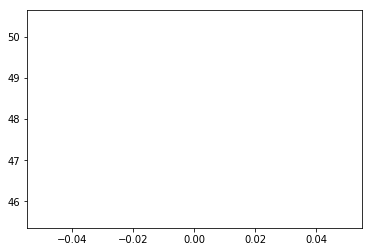

In [323]:
test_clf = train_classifier ((femur_train_3,femur_train_2,femur_train_1)) #input in a form of list, i.e. : clf = train_classifier ((vect_1,vect_2,vect_3))


(proba_array,largest_slice) = femur_head_selection (images_test_1,test_clf)

plt.plot(proba_array)
print(largest_slice)

In [301]:
####DEFINE TRAINING INPUT##########

images_train_name_1 = 'g2_56_image.nii.gz'
images_train_1 =  []
images_train_1.append(sitk.ReadImage(images_train_name_1, sitk.sitkFloat32))
lower_rg_1 = 81 #lower limit (where femur  head starts to exist)
upper_rg_1 = 130 #upper limit (where femur head is last seen)

images_train_name_2 = 'g2_57_image.nii.gz'
images_train_2 =  []
images_train_2.append(sitk.ReadImage(images_train_name_2, sitk.sitkFloat32))
lower_rg_2 = 44
upper_rg_2 = 110

images_train_name_3 = 'g2_58_image.nii.gz'
images_train_3 =  []
images_train_3.append(sitk.ReadImage(images_train_name_3, sitk.sitkFloat32))
lower_rg_3 = 46
upper_rg_3 = 110

#these are the training data, containing vector showing the existence of femur head along z-slices
femur_train_1 = get_femur_vector(images_train_1,lower_rg_1-1,upper_rg_1-1)#this is the training data, containing vector showing the existence of femur head along z-slices
femur_train_2 = get_femur_vector(images_train_2,lower_rg_2-1,upper_rg_2-1)
femur_train_3 = get_femur_vector(images_train_3,lower_rg_3-1,upper_rg_3-1)

In [166]:
#DEFINE TEST DATA####
images_test_name_1 = 'common_40_image.nii.gz'
images_test_1 =  []
images_test_1.append(sitk.ReadImage(images_test_name_1, sitk.sitkFloat32))


images_test_name_2 = 'common_41_image.nii.gz'
images_test_2 =  []
images_test_2.append(sitk.ReadImage(images_test_name_2, sitk.sitkFloat32))


images_test_name_3 = 'common_42_image.nii.gz'
images_test_3 =  []
images_test_3.append(sitk.ReadImage(images_test_name_3, sitk.sitkFloat32))


#these are the testing vector data, containing vector showing the existence of femur head along z-slices

lower_rg_1 = 54 #lower limit (where femur  head starts to exist)
upper_rg_1 = 104 #upper limit (where femur head is last seen)
femur_test_1 = get_femur_vector(images_test_1,lower_rg_1,upper_rg_1)#this is the testing data, containing vector showing the existence of femur head along z-slices

lower_rg_2 = 67
upper_rg_2 = 115
femur_test_2 = get_femur_vector(images_test_2,lower_rg_2,upper_rg_2)

lower_rg_3 = 47
upper_rg_3 = 103
femur_test_3 = get_femur_vector(images_test_3,lower_rg_3,upper_rg_3)

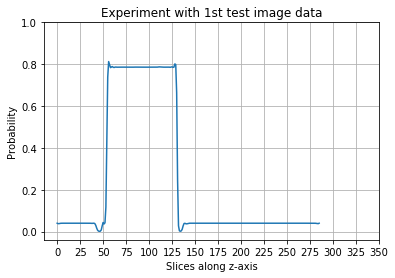

The slice with the largest probability of femur head appearance: 57
--------------------------------------------------
SLICES           PROBABILITY
[[ 57.           0.81264333]
 [129.           0.80137559]
 [ 58.           0.79890822]
 [130.           0.79857473]
 [ 61.           0.78880222]
 [126.           0.78761415]
 [112.           0.78727969]
 [113.           0.78690683]
 [111.           0.78679196]
 [ 60.           0.7867131 ]]




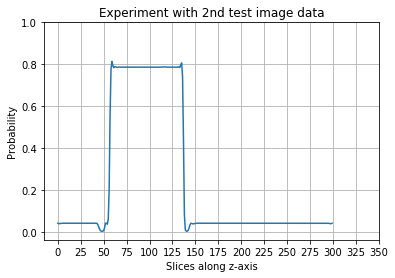

The slice with the largest probability of femur head appearance: 60
--------------------------------------------------
SLICES           PROBABILITY
[[ 60.           0.81309485]
 [136.           0.80624199]
 [135.           0.79633728]
 [ 61.           0.79452123]
 [ 64.           0.78869966]
 [132.           0.78761929]
 [ 63.           0.78723064]
 [118.           0.78719257]
 [117.           0.78715337]
 [119.           0.78652893]]




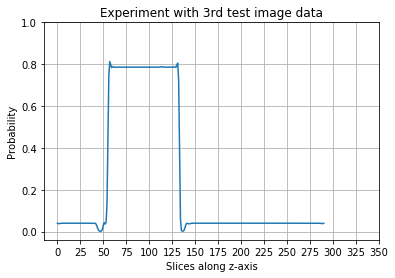

The slice with the largest probability of femur head appearance: 58
--------------------------------------------------
SLICES           PROBABILITY
[[ 58.           0.81281259]
 [132.           0.80547371]
 [ 59.           0.79890822]
 [131.           0.79694992]
 [ 62.           0.78889015]
 [128.           0.78759621]
 [114.           0.78728312]
 [115.           0.78688102]
 [113.           0.78684251]
 [ 61.           0.78652092]]




In [326]:
vect_list = (femur_train_1,femur_train_2,femur_train_3)


clf = train_classifier (vect_list) #input in a form of list, i.e. : clf = train_classifier ((vect_1,vect_2,vect_3))


(slice_largest, proba_array) = femur_head_selection (images_test_1,clf)

slice_largest
plt.plot(proba_array)
plt.grid()
plt.xlabel('Slices along z-axis');
plt.ylabel('Probability');
plt.title('Experiment with 1st test image data')
plt.xticks([0,25,50,75,100,125,150,175,200,225,250,275,300,325,350])
plt.yticks([0,0.2,0.4,0.6,0.8,1.0])
plt.show()

print('The slice with the largest probability of femur head appearance: {}' .format(slice_largest))
xpts=np.arange(1, (proba_array.size+1), 1)
xpts= np.asarray(xpts)

ypts=proba_array
ypts= np.asarray(ypts)

array_pre_sort = np.vstack((xpts, ypts)).T
array_post_sort =   array_pre_sort[(-array_pre_sort)[:,1].argsort()]
array_post_sort = array_post_sort[0:10,:]
print('--------------------------------------------------')
print('SLICES           PROBABILITY')
print(array_post_sort)
print('\n')






(slice_largest, proba_array) = femur_head_selection (images_test_2,clf)
plt.plot(proba_array)
plt.grid()
plt.xlabel('Slices along z-axis');
plt.ylabel('Probability');
plt.title('Experiment with 2nd test image data')
plt.xticks([0,25,50,75,100,125,150,175,200,225,250,275,300,325,350])
plt.yticks([0,0.2,0.4,0.6,0.8,1.0])
plt.show()

print('The slice with the largest probability of femur head appearance: {}' .format(slice_largest))
xpts=np.arange(1, (proba_array.size+1), 1)
xpts= np.asarray(xpts)

ypts=proba_array
ypts= np.asarray(ypts)

array_pre_sort = np.vstack((xpts, ypts)).T
array_post_sort =   array_pre_sort[(-array_pre_sort)[:,1].argsort()]
array_post_sort = array_post_sort[0:10,:]
print('--------------------------------------------------')
print('SLICES           PROBABILITY')
print(array_post_sort)
print('\n')



(slice_largest, proba_array) = femur_head_selection (images_test_3,clf)
plt.plot(proba_array)
plt.grid()
plt.xlabel('Slices along z-axis');
plt.ylabel('Probability');
plt.title('Experiment with 3rd test image data')
plt.xticks([0,25,50,75,100,125,150,175,200,225,250,275,300,325,350])
plt.yticks([0,0.2,0.4,0.6,0.8,1.0])
plt.show()

print('The slice with the largest probability of femur head appearance: {}' .format(slice_largest))
xpts=np.arange(1, (proba_array.size+1), 1)
xpts= np.asarray(xpts)

ypts=proba_array
ypts= np.asarray(ypts)

array_pre_sort = np.vstack((xpts, ypts)).T
array_post_sort =   array_pre_sort[(-array_pre_sort)[:,1].argsort()]
array_post_sort = array_post_sort[0:10,:]

print('--------------------------------------------------')
print('SLICES           PROBABILITY')
print(array_post_sort)
print('\n')

In [319]:


xpts=np.arange(1, (proba_array.size+1), 1)
xpts= np.asarray(xpts)

ypts=proba_array
ypts= np.asarray(ypts)

array_pre_sort = np.vstack((xpts, ypts)).T
array_post_sort =   array_pre_sort[(-array_pre_sort)[:,1].argsort()]
array_post_sort = array_post_sort[0:10,:]

print('SLICES           PROBABILITY')
print(array_post_sort)

SLICES           PROBABILITY
[[ 48.           0.80586005]
 [108.           0.80428654]
 [107.           0.80257371]
 [ 49.           0.8018623 ]
 [ 53.           0.80083516]
 [ 52.           0.80077476]
 [ 56.           0.80071257]
 [ 94.           0.80067929]
 [ 89.           0.80067915]
 [103.           0.80067246]]


In [151]:
a = np.array([[1,4],[2,1],[3,3],[4,9]])
print(a)




# sort list with key
a = a[a[:,1].argsort()]

a

[[1 4]
 [2 1]
 [3 3]
 [4 9]]


array([[2, 1],
       [3, 3],
       [1, 4],
       [4, 9]])

In [56]:
def femur_head_selection(im, classifier):

    xpts=[0]

    ypts=np.arange(im[0].GetSize()[2])
    X_test = np.array(list(itertools.product(xpts, ypts)))
    proba_class = classifier.predict_proba(X_test)

    femur_presence_proba=proba_class[:,1]

    slice_max = np.argmax(femur_presence_proba, axis=0)
    
    ####shifting adjustment####
    slice_number_test = im[0].GetSize()[2]
    slice_max_adj = round((slice_max*slice_number_test /282),0) + 1
    
    return slice_max_adj

In [57]:
print(femur_train_1.shape[1])
print(femur_train_2.shape[1])
print(femur_train_3.shape[1])
print('____________________')

print(femur_test_1.shape[1])
print(femur_test_2.shape[1])
print(femur_test_3.shape[1])



xpts_test1=[0]
ypts_test1=np.arange(femur_test_1.shape[1])
array_test1 = np.array(list(itertools.product(xpts_test1, ypts_test1)))

282
248
277
____________________
286
300
291


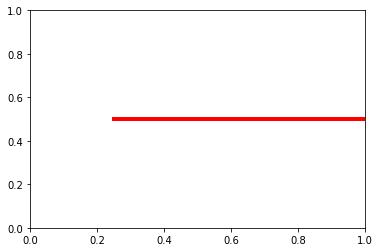

In [36]:
#line = axs.Axes.axhline(linewidth=femur_test_3.shape[1])



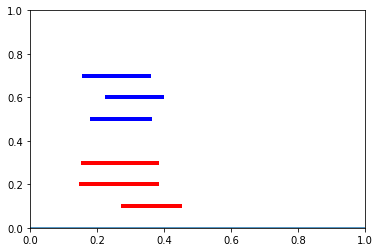

In [45]:

####DEFINE TRAINING INPUT##########

lower_rg_1 = 81 #lower limit (where femur  head starts to exist)
upper_rg_1 = 130 #upper limit (where femur head is last seen)
plt.axhline()

plt.axhline(linewidth=4, color='r',y=.1, xmin=lower_rg_1/291, xmax=upper_rg_1/291)

lower_rg_2 = 44
upper_rg_2 = 110

plt.axhline(linewidth=4, color='r',y=.2, xmin=lower_rg_2/291, xmax=upper_rg_2/291)
lower_rg_3 = 46
upper_rg_3 = 110
plt.axhline(linewidth=4, color='r',y=.3, xmin=lower_rg_3/291, xmax=upper_rg_3/291)



#these are the testing vector data, containing vector showing the existence of femur head along z-slices

lower_rg_1 = 54 #lower limit (where femur  head starts to exist)
upper_rg_1 = 104 #upper limit (where femur head is last seen)
plt.axhline(linewidth=4, color='b',y=.5, xmin=lower_rg_1/291, xmax=upper_rg_1/291)

lower_rg_2 = 67
upper_rg_2 = 115
plt.axhline(linewidth=4, color='b',y=.6, xmin=lower_rg_2/291, xmax=upper_rg_2/291)
lower_rg_3 = 47
upper_rg_3 = 103
plt.axhline(linewidth=4, color='b',y=.7, xmin=lower_rg_3/291, xmax=upper_rg_3/291)